In [2]:
# Flowers Picture Classifier Using Transfer Learning with Xception
import tensorflow as tf
import tensorflow_datasets as tfds

dataset, info = tfds.load('tf_flowers', as_supervised=True, with_info=True)
dataset_size = info.splits['train'].num_examples
class_names = info.features['label'].names # ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
n_classes = info.features['label'].num_classes # 5



2024-02-16 05:41:46.442808: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /Users/mehannioui/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


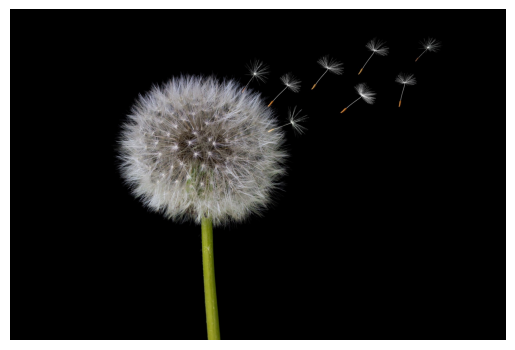

In [11]:
# load dandelion-2266558_1920.jpg and display it
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

dandelion = PIL.Image.open('dandelion-2266558_1920.jpg')
dandelion = np.array(dandelion)
plt.imshow(dandelion)
plt.axis('off')
plt.show()

In [18]:
# Clssiification of an image titled dandelion-2266558_1920.jpg in folder with Xception model using keras.applications
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import os

# load dandelion-2266558_1920.jpg and display it
image_path = 'dandelion-2266558_1920.jpg'

img = PIL.Image.open(image_path)
img = np.array(img)

# Load the Xception model pre-trained on ImageNet data
model = tf.keras.applications.xception.Xception(weights='imagenet')

# preprocess the image
preprocess = tf.keras.Sequential([
tf.keras.layers.Resizing(height=299, width=299, crop_to_aspect_ratio=True),
tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])
img = preprocess(img)
img = np.expand_dims(img, axis=0)
print(img.shape)

# img = tf.keras.preprocessing.image.load_img(img_path, target_size=(299, 299))
# img = tf.keras.preprocessing.image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = tf.keras.applications.xception.preprocess_input(img)

# Use the model to classify the image
predictions = model.predict(img)
print('Predicted:', tf.keras.applications.xception.decode_predictions(predictions, top=15)[0])

(1, 299, 299, 3)
1/1 [==============================] - 0s 373ms/step
Predicted: [('n04350905', 'suit', 0.75418395), ('n04591157', 'Windsor_tie', 0.18407717), ('n02883205', 'bow_tie', 0.009073796), ('n10148035', 'groom', 0.00667343), ('n03670208', 'limousine', 0.0031188347), ('n03680355', 'Loafer', 0.0026479359), ('n03787032', 'mortarboard', 0.0017503104), ('n02865351', 'bolo_tie', 0.0016720888), ('n02669723', 'academic_gown', 0.0013367445), ('n04162706', 'seat_belt', 0.0012972238), ('n03832673', 'notebook', 0.000673178), ('n04456115', 'torch', 0.00053921895), ('n02948072', 'candle', 0.00039354168), ('n04479046', 'trench_coat', 0.000368325), ('n04584207', 'wig', 0.00034670281)]


In [20]:
# Transfer Learning with Xception
# Load the Xception model pre-trained on ImageNet data, excluding the top of the network
base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False)

# Freeze the base model
base_model.trainable = False

# Create a new model on top
inputs = tf.keras.layers.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(n_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer=keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load the flowers dataset
train_set = dataset['train']
test_set = dataset['test']

# Preprocess the images
def preprocess(image, label):
    resized_image = tf.image.resize(image, [299, 299])
    final_image = tf.keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)

# Train the model
history = model.fit(train_set, epochs=5, validation_data=test_set)

# Fine-Tuning the Model
# Unfreeze the top layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-3]:
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



83683744/83683744 [==============================] - 3s 0us/step


ValueError: decay is deprecated in the new Keras optimizer, please check the docstring for valid arguments, or use the legacy optimizer, e.g., tf.keras.optimizers.legacy.SGD.